In [1]:
#importing all needed packages
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing Iris data set from scikit
iris = datasets.load_iris()

X= iris.data
Y = iris.target
target_names = iris.target_names

Data = pd.DataFrame(X, columns = iris['feature_names'])

In [4]:
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
pca = PCA(n_components = 2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_r2 = lda.fit(X, Y).transform(X)

svd = TruncatedSVD(n_components = 2)
X_s = svd.fit(X).transform(X)

In [28]:
print("The percentage of variance explained by first two components %s" %str(pca.explained_variance_ratio_))

The percentage of variance explained by first two components [0.92461872 0.05306648]


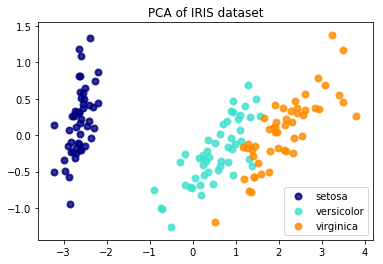

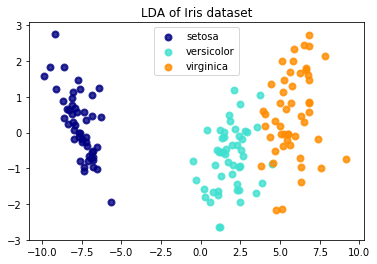

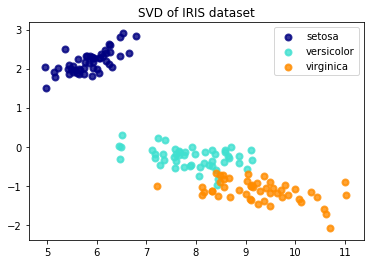

In [29]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color = color, alpha = 0.8, lw = lw, label = target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title("PCA of IRIS dataset")

plt.figure()

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], color = color, alpha = 0.8, lw = lw, label = target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title("LDA of Iris dataset")

plt.figure()

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_s[Y == i, 0], X_s[Y == i, 1], color = color, alpha = 0.8, lw = lw, label = target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title("SVD of IRIS dataset")

plt.show()

In [30]:
print(svd.explained_variance_ratio_)

[0.52875361 0.44845576]


---

### Eigen value decomposition

In [11]:
from sklearn.preprocessing import StandardScaler

In [14]:
# normalizing the data set
scaled_X = StandardScaler().fit_transform(Data)
pd.DataFrame(scaled_X, columns = iris.feature_names)

#calculating the covariance of the data
cov_matrix = np.cov(scaled_X.T)

#calculating the eigenvalues and eigenvectors of the covariance matrix
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

#choosing the first two components
V = eigenvecs[:,:2]

#project original values into eigenvectors
projected_X = scaled_X.dot(V)

In [37]:
#Examine Principal components
X_pca = pd.DataFrame(projected_X, columns = ['PC1', 'PC2'])
X_pca["Target"]= Y

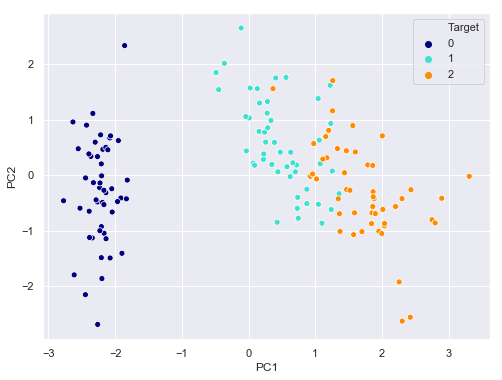

In [60]:
colors = ['navy', 'turquoise', 'darkorange']
sns.set()

#plotting the data 
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x = "PC1", y = "PC2", hue = "Target", data = X_pca, palette = colors)

In [45]:
#using scikit learn package
X_scik_pca = pca.fit_transform(scaled_X)
pd.DataFrame(X_scik_pca, columns = ["PC1", "PC2"]).head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
